In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout 
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

from sklearn.metrics import classification_report,confusion_matrix

import tensorflow as tf

import cv2
import os

import numpy as np

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
labels = ['Non Oil Spill','Oil Spill']
img_size = 150
def get_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img))[...,::-1] #convert BGR to RGB format
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

In [5]:
train =get_data ('/content/drive/MyDrive/oil_dataset/train')  # Path to the training data directory
val =get_data ('/content/drive/MyDrive/oil_dataset/validation')  # Path to the validation data directory
test = get_data ('/content/drive/MyDrive/oil_dataset/test')  # Path to the test data directory


<ipython-input-4-08b0147452da>:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(data)


In [6]:
#training dataset-oil spill
import os
len(os.listdir("/content/drive/MyDrive/oil_dataset/train/Oil Spill"))

400

In [7]:
#training dataset- Non oil spill
import os
len(os.listdir("/content/drive/MyDrive/oil_dataset/train/Non Oil Spill"))

460

In [8]:
#testing dataset-oil spill
import os
len(os.listdir("/content/drive/MyDrive/oil_dataset/test/Oil Spill"))

50

In [9]:
#testing dataset-Non oil spill
import os
len(os.listdir("/content/drive/MyDrive/oil_dataset/test/Non Oil Spill"))

59

In [10]:
#validation dataset-oil spill
import os
len(os.listdir("/content/drive/MyDrive/oil_dataset/validation/Oil Spill"))

50

In [11]:
#validation dataset-Non oil spill
import os
len(os.listdir("/content/drive/MyDrive/oil_dataset/validation/Non Oil Spill"))

57

In [12]:
import seaborn as sns

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


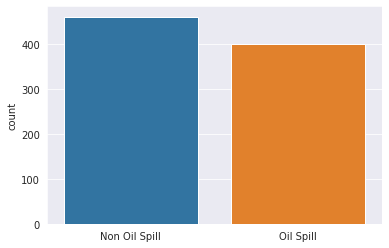

In [13]:
l = []
for i in train:
    if(i[1] == 0):
        l.append("Non Oil Spill")
    else:
        l.append("Oil Spill")
sns.set_style('darkgrid')
sns.countplot(l)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


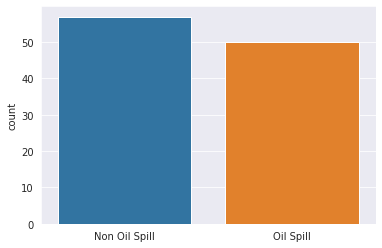

In [14]:
a = []
for i in val:
    if(i[1] == 0):
        a.append("Non Oil Spill")
    else:
        a.append("Oil Spill")
sns.set_style('darkgrid')
sns.countplot(a)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


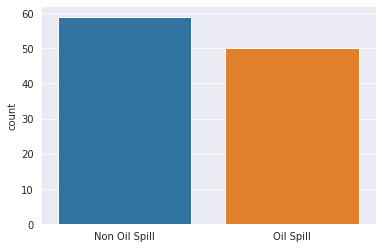

In [15]:
b = []
for i in test:
    if(i[1] == 0):
        b.append("Non Oil Spill")
    else:
        b.append("Oil Spill")
sns.set_style('darkgrid')
sns.countplot(b)

Text(0.5, 1.0, 'Non Oil Spill')

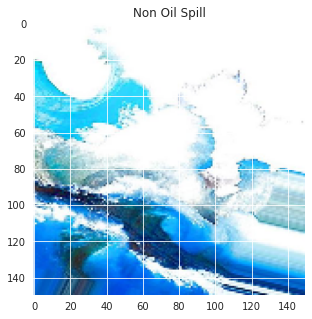

In [16]:
plt.figure(figsize = (5,5))
plt.imshow(train[1][0])
plt.title(labels[train[0][1]])

Text(0.5, 1.0, 'Oil Spill')

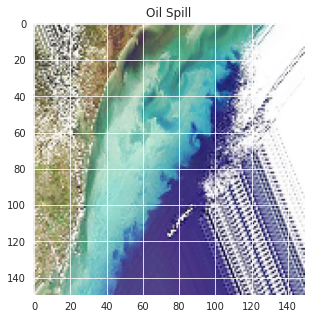

In [17]:
plt.figure(figsize = (5,5))
plt.imshow(train[-1][0])
plt.title(labels[train[-1][1]])

In [18]:
x_train = []
y_train = []
x_val = []
y_val = []
x_test = []
y_test = []

for feature, label in train:
  x_train.append(feature)
  y_train.append(label)

for feature, label in val:
  x_val.append(feature)
  y_val.append(label)

for feature, label in test:
  x_test.append(feature)
  y_test.append(label)

# Normalize the data
x_train = np.array(x_train) / 255
x_val = np.array(x_val) / 255
x_test=np.array(x_test)/255

x_train.reshape(-1, img_size, img_size, 1)
y_train = np.array(y_train)

x_val.reshape(-1, img_size, img_size, 1)
y_val = np.array(y_val)

x_test.reshape(-1, img_size, img_size, 1)
y_test = np.array(y_test)

In [19]:
print("x_train:",x_train.shape)
print("y_train:",y_train.shape)
print("x_test:",x_test.shape)
print("y_test:",y_test.shape)
print("x_val:",x_val.shape)
print("y_val:",y_val.shape)

x_train: (860, 150, 150, 3)
y_train: (860,)
x_test: (109, 150, 150, 3)
y_test: (109,)
x_val: (107, 150, 150, 3)
y_val: (107,)


In [20]:
datagen = ImageDataGenerator(
       featurewise_center=False,  
       samplewise_center=False,  
       featurewise_std_normalization=False,  
       samplewise_std_normalization=False,  
       zca_whitening=False,  
       rotation_range = 90, 
       zoom_range = 0.5, 
       width_shift_range=0.2,  
       height_shift_range=0.2,  
       horizontal_flip = True,  
       
)

datagen.fit(x_train)
datagen.fit(x_val)
datagen.fit(x_test)

In [21]:
from tensorflow.keras.applications import ResNet101V2
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout,BatchNormalization,Activation
convlayer=ResNet101V2(input_shape=(150,150,3),weights='imagenet',include_top=False)
for layer in convlayer.layers:
    layer.trainable=False

171317808/171317808 [==============================] - 7s 0us/step


In [22]:
model=Sequential()
model.add(convlayer)
model.add(Dropout(0.5))
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(1024,kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(512,kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(2,activation='softmax'))

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet101v2 (Functional)    (None, 5, 5, 2048)        42626560  
                                                                 
 dropout (Dropout)           (None, 5, 5, 2048)        0         
                                                                 
 flatten (Flatten)           (None, 51200)             0         
                                                                 
 batch_normalization (BatchN  (None, 51200)            204800    
 ormalization)                                                   
                                                                 
 dense (Dense)               (None, 1024)              52429824  
                                                                 
 batch_normalization_1 (Batc  (None, 1024)             4096      
 hNormalization)                                        

In [24]:
optimizer ='adam'
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

In [25]:
history=model.fit(x_train,y_train,validation_data=(x_val,y_val),epochs=10,batch_size=32,shuffle=True)

Epoch 1/10
27/27 [==============================] - 231s 8s/step - loss: 0.6851 - accuracy: 0.7372 - val_loss: 0.7277 - val_accuracy: 0.8131
Epoch 2/10
27/27 [==============================] - 193s 7s/step - loss: 0.1920 - accuracy: 0.9302 - val_loss: 0.6030 - val_accuracy: 0.8692
Epoch 3/10
27/27 [==============================] - 193s 7s/step - loss: 0.0903 - accuracy: 0.9733 - val_loss: 0.4233 - val_accuracy: 0.8879
Epoch 4/10
27/27 [==============================] - 195s 7s/step - loss: 0.0429 - accuracy: 0.9837 - val_loss: 0.4156 - val_accuracy: 0.8785
Epoch 5/10
27/27 [==============================] - 194s 7s/step - loss: 0.0489 - accuracy: 0.9791 - val_loss: 0.3739 - val_accuracy: 0.8879
Epoch 6/10
27/27 [==============================] - 191s 7s/step - loss: 0.0334 - accuracy: 0.9895 - val_loss: 0.4128 - val_accuracy: 0.8879
Epoch 7/10
27/27 [==============================] - 197s 7s/step - loss: 0.0255 - accuracy: 0.9907 - val_loss: 0.3851 - val_accuracy: 0.8785
Epoch 8/10
27

In [27]:
model.save('resnet1.h5')

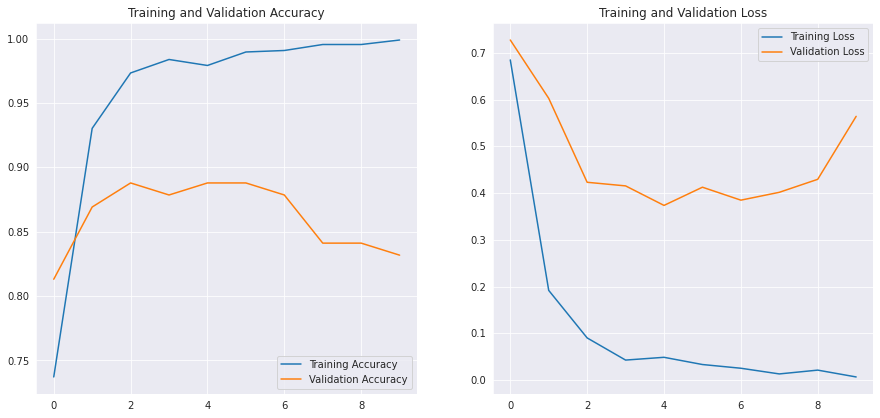

In [28]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [29]:
predictions = model.predict(x_test)
pred=np.argmax(predictions,axis=1)
pred = pred.reshape(1,-1)[0]
print(classification_report(y_test,pred, target_names = ['Non Oil Spill(Class 0)','Oil Spill (Class 1)']))

4/4 [==============================] - 21s 4s/step
                        precision    recall  f1-score   support

Non Oil Spill(Class 0)       0.84      0.97      0.90        59
   Oil Spill (Class 1)       0.95      0.78      0.86        50

              accuracy                           0.88       109
             macro avg       0.89      0.87      0.88       109
          weighted avg       0.89      0.88      0.88       109



Text(0, 0.5, 'Loss')

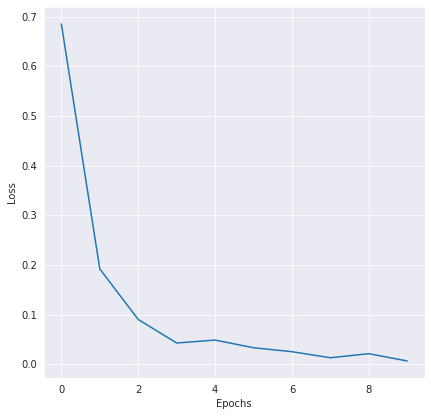

In [31]:
loss = history.history['loss']
epochs_range = range(10)
plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, loss, label='loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

In [32]:
model.evaluate(x_test,y_test,batch_size=32)

4/4 [==============================] - 18s 4s/step - loss: 0.3039 - accuracy: 0.8807


[0.30390527844429016, 0.8807339668273926]

In [33]:
#on training data
predictions = model.predict(x_train)
pred_train=np.argmax(predictions,axis=1)
pred_train = pred_train.reshape(1,-1)[0]
print(classification_report(y_train,pred_train, target_names = ['Non Oil Spill(Class 0)','Oil Spill (Class 1)']))

27/27 [==============================] - 179s 6s/step
                        precision    recall  f1-score   support

Non Oil Spill(Class 0)       1.00      1.00      1.00       460
   Oil Spill (Class 1)       1.00      1.00      1.00       400

              accuracy                           1.00       860
             macro avg       1.00      1.00      1.00       860
          weighted avg       1.00      1.00      1.00       860



In [36]:
model.evaluate(x_train,y_train,batch_size=32)

27/27 [==============================] - 157s 6s/step - loss: 0.0017 - accuracy: 0.9988


[0.001691210549324751, 0.9988372325897217]

In [35]:
#on validation data
predictions = model.predict(x_val)
pred_val=np.argmax(predictions,axis=1)
pred_val = pred_val.reshape(1,-1)[0]
print(classification_report(y_val,pred_val, target_names = ['Non Oil Spill(Class 0)','Oil Spill (Class 1)']))

4/4 [==============================] - 18s 4s/step
                        precision    recall  f1-score   support

Non Oil Spill(Class 0)       0.79      0.93      0.85        57
   Oil Spill (Class 1)       0.90      0.72      0.80        50

              accuracy                           0.83       107
             macro avg       0.85      0.82      0.83       107
          weighted avg       0.84      0.83      0.83       107



In [37]:
model.evaluate(x_val,y_val,batch_size=32)

4/4 [==============================] - 19s 4s/step - loss: 0.5644 - accuracy: 0.8318


[0.5643976926803589, 0.8317757248878479]

In [38]:
predictions = np.argmax(model.predict(x_test),axis=1)
predictions = predictions.reshape(1,-1)[0]

4/4 [==============================] - 18s 4s/step


In [39]:
predictions = model.predict(x_test)
pred=np.argmax(predictions,axis=1)
pred = pred.reshape(1,-1)[0]
print(classification_report(y_test,pred, target_names = ['Non Oil Spill(Class 0)','Oil Spill (Class 1)']))

4/4 [==============================] - 23s 4s/step
                        precision    recall  f1-score   support

Non Oil Spill(Class 0)       0.84      0.97      0.90        59
   Oil Spill (Class 1)       0.95      0.78      0.86        50

              accuracy                           0.88       109
             macro avg       0.89      0.87      0.88       109
          weighted avg       0.89      0.88      0.88       109



In [40]:
from sklearn.metrics import accuracy_score
classes_x=np.argmax(predictions,axis=1)
accuracy = accuracy_score(y_test,classes_x)
print('Accuracy: %f' % accuracy)

Accuracy: 0.880734
